In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn import linear_model

In [26]:
# Linear Regression

df = pd.read_csv("home_price.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


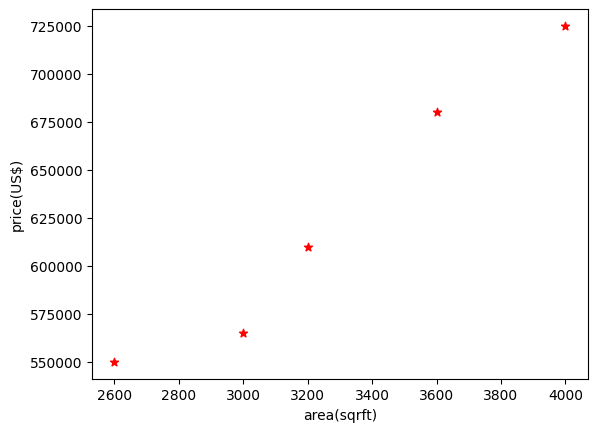

In [27]:
plt.xlabel("area(sqrft)")
plt.ylabel("price(US$)")
plt.scatter(df.area, df.price, color="r", marker="*")
plt.show()

In [28]:
reg= linear_model.LinearRegression()
reg.fit(df[['area']],df.price)

LinearRegression()

In [33]:
reg.predict([[3300]])

c:\Users\Nishil Tejani\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [34]:
reg.coef_

array([135.78767123])

In [35]:
reg.intercept_

180616.43835616432

In [36]:
# y=m*x+b 
135.78767123*3300+180616.43835616432

628715.7534151643

In [37]:
d= pd.read_csv("area.csv")
d.head()

,area
0,10000
1,3300
2,1150
3,4500
4,2851


In [38]:
p = reg.predict(d)

In [39]:
d["price"]=p 

In [40]:
d.to_csv('prediction.csv', index=False)

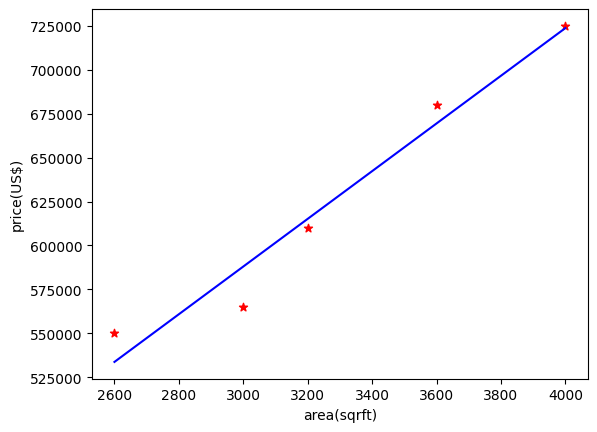

In [41]:
plt.xlabel("area(sqrft)")
plt.ylabel("price(US$)")
plt.scatter(df.area, df.price, color="r", marker="*")
plt.plot(df.area, reg.predict(df[["area"]]), color="b")
plt.show()

In [42]:
# Logistic Regression


df1 = pd.read_csv("Insurance.csv")
df1.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,54,1
4,46,1


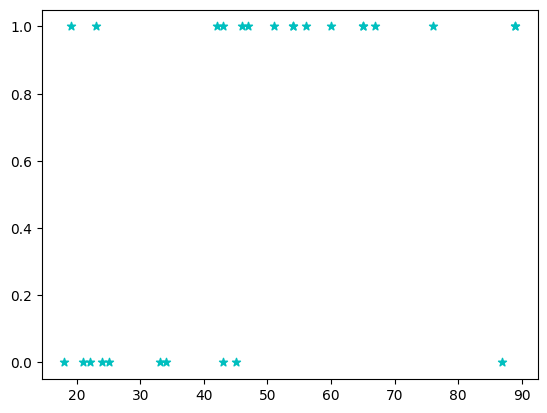

In [43]:
plt.scatter(df1.age, df1.bought_insurance, marker="*", color="c")
plt.show()

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X_train, X_test, y_train, y_test =train_test_split(df1[["age"]], df1.bought_insurance, test_size=0.1)

In [46]:
X_test

,age
12,54
0,22
11,56


In [47]:
# X_train

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
model = LogisticRegression()

In [51]:
model.fit(X_train, y_train)

LogisticRegression()

In [52]:
model.predict(X_test)

array([1, 0, 1], dtype=int64)

In [53]:
model.score(X_test, y_test)

1.0

In [54]:
model.predict_proba(X_test)

array([[0.28201942, 0.71798058],
       [0.65549331, 0.34450669],
       [0.26248831, 0.73751169]])

In [57]:
model.predict([[23]])

c:\Users\Nishil Tejani\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [58]:
from sklearn.datasets import load_digits

In [59]:
digits = load_digits()

In [60]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [61]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 640x480 with 0 Axes>

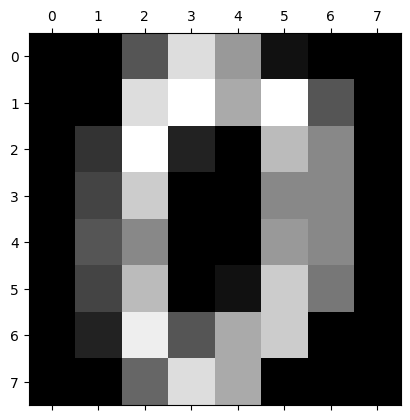

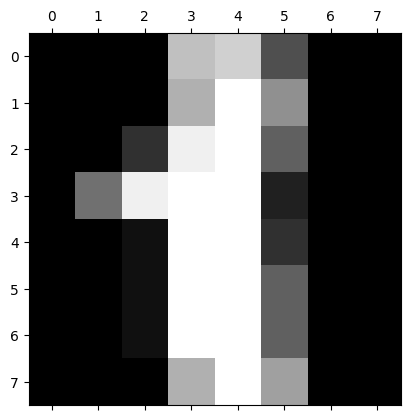

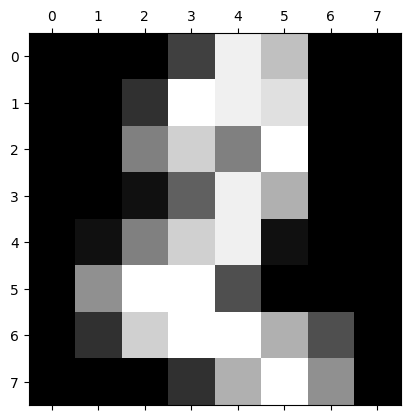

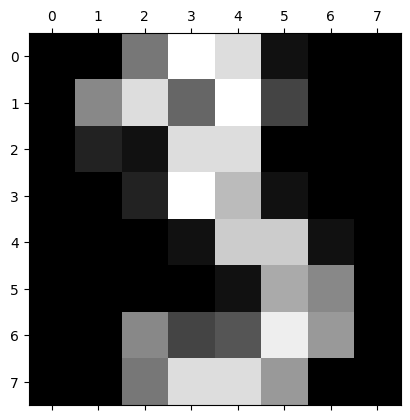

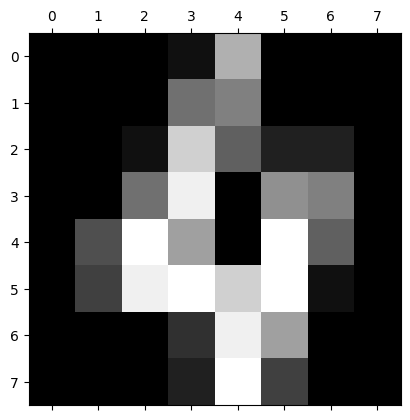

In [66]:
plt.gray()
for i in range(5):
    plt.matshow(digits.images[i])

In [68]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [69]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test =train_test_split(digits.data, digits.target, test_size=0.2)

In [73]:
len(X_train)

1437

In [74]:
len(X_test)

360

In [83]:
from sklearn.linear_model import LogisticRegression

In [89]:
model=LogisticRegression()

In [90]:
model.fit(X_train, y_train)

c:\Users\Nishil Tejani\miniconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
model.score(X_test, y_test)

0.9777777777777777

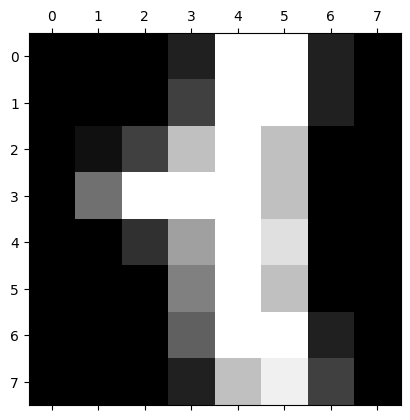

In [99]:
plt.matshow(digits.images[21])

In [100]:
digits.target[21]

1

In [101]:
model.predict([digits.data[21]])

array([1])

In [102]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [103]:
from sklearn.metrics import confusion_matrix

In [105]:
y_predicted = model.predict(X_test)

cm = confusion_matrix(y_test, y_predicted)
cm

array([[34,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 27,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 43,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  1],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 35,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 31]], dtype=int64)

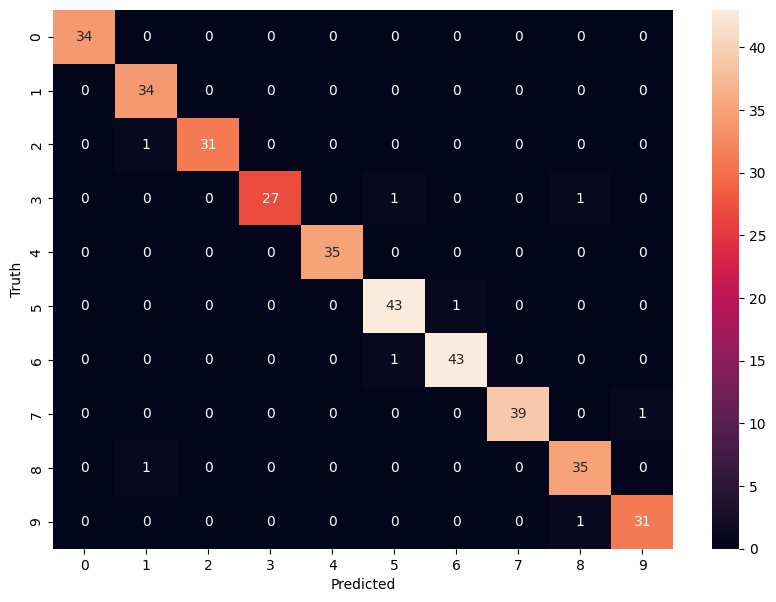

In [106]:
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()

In [107]:
# Decision Tree

df= pd.read_csv("Data Science Jobs Salaries.csv")
df.head()

,degree,company_location,salary_more_than_100k,job_title,salary
0,masters,DE,0,Data Science Consultant,54000
1,bachelors,US,0,Data Scientist,60000
2,masters,RU,0,Head of Data Science,85000
3,bachelors,RU,1,Head of Data,230000
4,masters,US,1,Machine Learning Engineer,125000


In [108]:
inputs = df.drop("salary_more_than_100k", axis = "columns")
target = df["salary_more_than_100k"]

In [109]:
from sklearn.preprocessing import LabelEncoder

In [110]:
le_company_location	= LabelEncoder()
le_job_title = LabelEncoder()
le_degree = LabelEncoder()

In [116]:
inputs['company_n'] = le_company_location.fit_transform(inputs["company_location"])
inputs['job_n'] = le_company_location.fit_transform(inputs["job_title"])
inputs['degree_n'] = le_company_location.fit_transform(inputs["degree"])
inputs.head()

,degree,company_location,job_title,salary,company_n,job_n,degree_n
0,masters,DE,Data Science Consultant,54000,2,4,1
1,bachelors,US,Data Scientist,60000,7,6,0
2,masters,RU,Head of Data Science,85000,5,8,1
3,bachelors,RU,Head of Data,230000,5,7,0
4,masters,US,Machine Learning Engineer,125000,7,9,1


In [120]:
inputs_n = inputs.drop(['company_location', 'job_title', 'degree', "salary"], axis="columns")
inputs_n

,company_n,job_n,degree_n
0,2,4,1
1,7,6,0
2,5,8,1
3,5,7,0
4,7,9,1
5,7,1,1
6,7,11,0
7,3,0,1
8,0,2,0
9,1,5,1


In [121]:
from sklearn import tree

In [122]:
model = tree.DecisionTreeClassifier()

In [124]:
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [125]:
model.score(inputs_n, target)

1.0

In [127]:
model.predict([[2,4,1]])

c:\Users\Nishil Tejani\miniconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [1]:
# SVM

import pandas as pd 
from sklearn.datasets import load_iris
iris = load_iris()

In [129]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [130]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [132]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [133]:
df["target"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [139]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [140]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


In [141]:
df["flower_name"] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [142]:
from matplotlib import pyplot as plt

In [143]:
df0 = df[df.target==0]
df1 = df[df.target==1]
df2 = df[df.target==2]

In [144]:
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [145]:
df1.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [146]:
df2.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


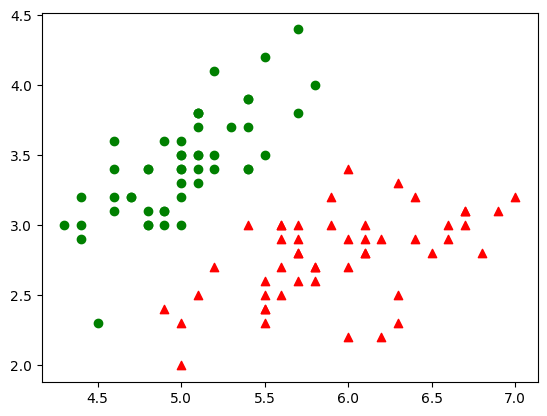

In [148]:
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color="green", marker="o")
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color="red", marker="^")
plt.show()

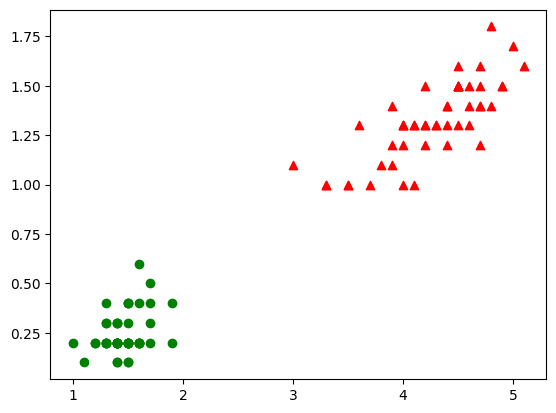

In [149]:
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color="green", marker="o")
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color="red", marker="^")
plt.show()

In [150]:
from sklearn.model_selection import train_test_split

In [151]:
X = df.drop(["target", "flower_name"], axis="columns")
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [165]:
y= df.target

In [166]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [167]:
len(X_train)

120

In [168]:
len(X_test)

30

In [173]:
from sklearn.svm import SVC
model = SVC(C=10)

In [174]:
model.fit(X_train, y_train)

SVC(C=10)

In [175]:
model.score(X_test, y_test)

0.9

In [176]:
# Random Forest

import pandas as pd 
from sklearn.datasets import load_digits
digits = load_digits()

In [177]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 640x480 with 0 Axes>

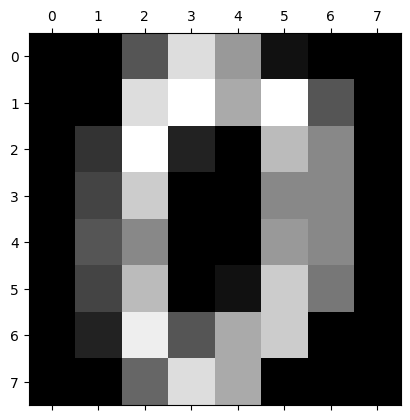

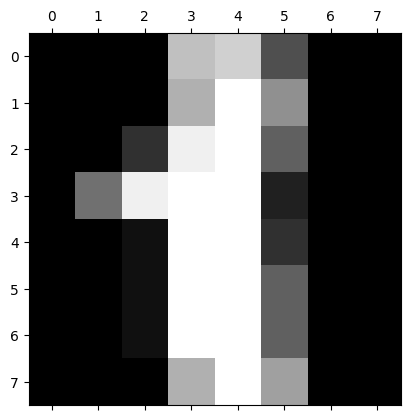

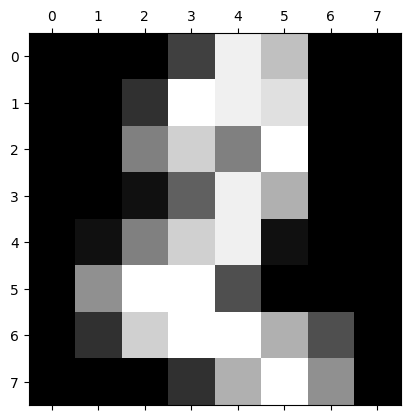

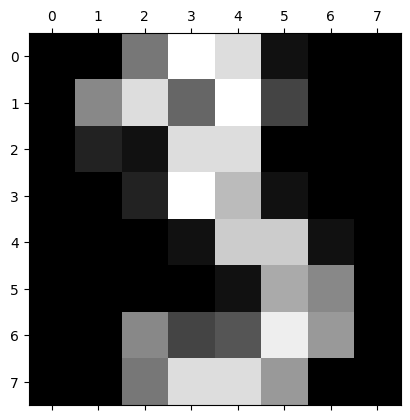

In [182]:
plt.gray()
for i in range(4):
    plt.matshow(digits.images[i])

In [183]:
digits.data[:5]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
        15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
        12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
         0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
        10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 12., 13.,  5.,  0.,  0.,  0.,  0.,  0., 11., 16.,
         9.,  0.,  0.,  0.,  0.,  3., 15., 16.,  6.,  0.,  0.,  0.,  7.,
        15., 16., 16.,  2.,  0.,  0.,  0.,  0.,  1., 16., 16.,  3.,  0.,
         0.,  0.,  0.,  1., 16., 16.,  6.,  0.,  0.,  0.,  0.,  1., 16.,
        16.,  6.,  0.,  0.,  0.,  0.,  0., 11., 16., 10.,  0.,  0.],
       [ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
        14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
         1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
         0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  

In [184]:
df = pd.DataFrame(digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [185]:
df['target']=  digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [187]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target'], axis='columns'), digits.target, test_size= 0.2)

In [188]:
len(X_test)

360

In [189]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [190]:
model.score(X_test, y_test)

0.975

In [191]:
y_predicted = model.predict(X_test)

In [192]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[29,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 33,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 40,  0,  1,  0,  0,  1,  2],
       [ 0,  0,  0,  0, 27,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  1,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0, 32,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 26,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  1,  0, 41,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 39]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

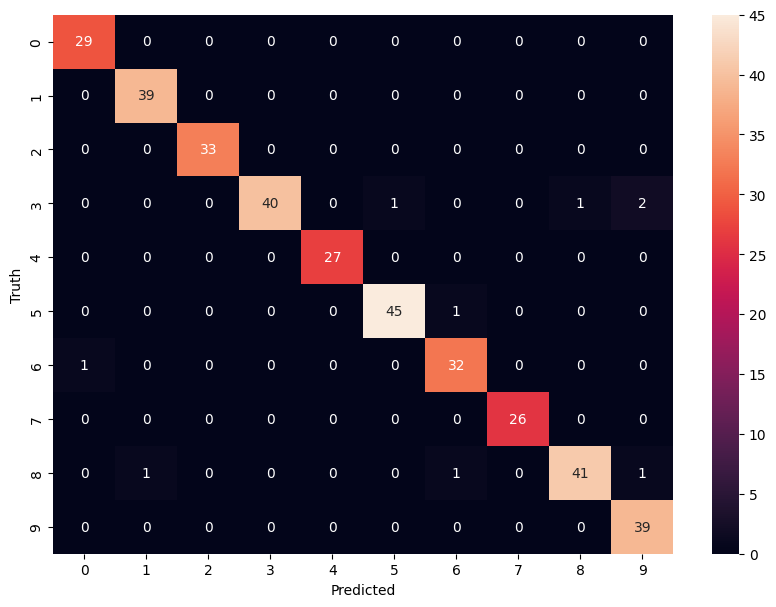

In [194]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [204]:
#Naive Bayes

df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [205]:
df.drop(["PassengerId", "Name", "SibSp", "Parch", "Ticket", "Cabin", "Embarked"], axis="columns", inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [207]:
target= df.Survived
inputs = df.drop("Survived", axis="columns")

In [209]:
dummies = pd.get_dummies(inputs.Sex)
dummies.head()

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True


In [210]:
inputs = pd.concat([inputs, dummies], axis="columns")
inputs.head()

,Pclass,Sex,Age,Fare,female,male
0,3,male,22.0,7.2500,False,True
1,1,female,38.0,71.2833,True,False
2,3,female,26.0,7.9250,True,False
3,1,female,35.0,53.1000,True,False
4,3,male,35.0,8.0500,False,True


In [211]:
inputs.drop('Sex', axis='columns', inplace=True)
inputs.head()

,Pclass,Age,Fare,female,male
0,3,22.0,7.2500,False,True
1,1,38.0,71.2833,True,False
2,3,26.0,7.9250,True,False
3,1,35.0,53.1000,True,False
4,3,35.0,8.0500,False,True


In [212]:
inputs.columns[inputs.isna().any()]

Index(['Age'], dtype='object')

In [213]:
inputs.Age[:10]

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64

In [246]:
inputs.Age = inputs.Age.fillna(inputs.Age.mean())
inputs.head(7)

,Pclass,Age,Fare,female,male
0,3,22.00000,7.2500,False,True
1,1,38.00000,71.2833,True,False
2,3,26.00000,7.9250,True,False
3,1,35.00000,53.1000,True,False
4,3,35.00000,8.0500,False,True
5,3,27.60287,8.4583,False,True
6,1,54.00000,51.8625,False,True


In [247]:
X_train, X_test, y_train, y_test = train_test_split(inputs, target, test_size=0.2)

In [248]:
len(X_train)

115

In [249]:
len(X_test)

29

In [250]:
len(inputs)

144

In [251]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [252]:
model.fit(X_train, y_train)

GaussianNB()

In [253]:
model.score(X_test, y_test)

0.7931034482758621

In [254]:
X_test[:10]

,Pclass,Age,Fare,female,male
93,3,26.00000,20.5750,False,True
72,2,21.00000,73.5000,False,True
78,2,0.83000,29.0000,False,True
119,3,2.00000,31.2750,True,False
102,1,21.00000,77.2875,False,True
67,3,19.00000,8.1583,False,True
82,3,27.60287,7.7875,True,False
125,3,12.00000,11.2417,False,True
117,2,29.00000,21.0000,False,True
127,3,24.00000,7.1417,False,True


In [255]:
y_test[:10]

93     0
72     0
78     1
119    0
102    0
67     0
82     1
125    1
117    0
127    1
Name: Survived, dtype: int64

In [256]:
model.predict(X_test[:10])

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [257]:
model.predict_proba(X_test[:10])

array([[0.98406317, 0.01593683],
       [0.94440059, 0.05559941],
       [0.99331304, 0.00668696],
       [0.1358937 , 0.8641063 ],
       [0.83202107, 0.16797893],
       [0.98541159, 0.01458841],
       [0.04200513, 0.95799487],
       [0.98961848, 0.01038152],
       [0.97268148, 0.02731852],
       [0.98418965, 0.01581035]])

In [2]:
# KNN

import pandas as pd 
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df.shape

(150, 4)

In [8]:
df["target"] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [10]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [11]:
df["flower_name"] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [12]:
df[45:55]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
45,4.8,3.0,1.4,0.3,0,setosa
46,5.1,3.8,1.6,0.2,0,setosa
47,4.6,3.2,1.4,0.2,0,setosa
48,5.3,3.7,1.5,0.2,0,setosa
49,5.0,3.3,1.4,0.2,0,setosa
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


In [13]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

In [14]:
import matplotlib.pyplot as plt 

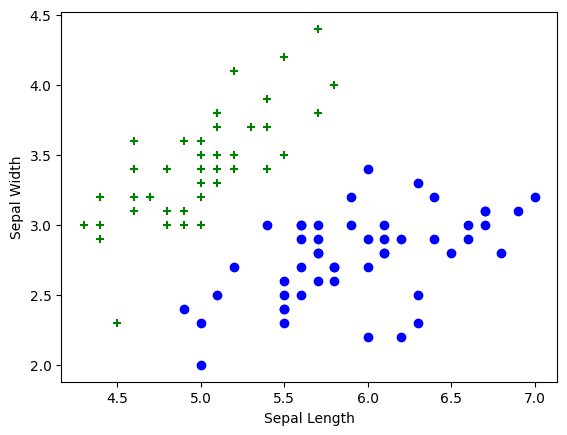

In [18]:
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(df0["sepal length (cm)"], df0["sepal width (cm)"], color="green", marker="+")
plt.scatter(df1["sepal length (cm)"], df1["sepal width (cm)"], color="blue", marker="o")
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X = df.drop(['target', 'flower_name'], axis='columns')
y = df.target

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [22]:
len(X_train)

120

In [23]:
len(X_test)

30

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [35]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [36]:
knn.score(X_test, y_test)

0.9666666666666667

In [37]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]], dtype=int64)

Text(58.222222222222214, 0.5, 'Truth')

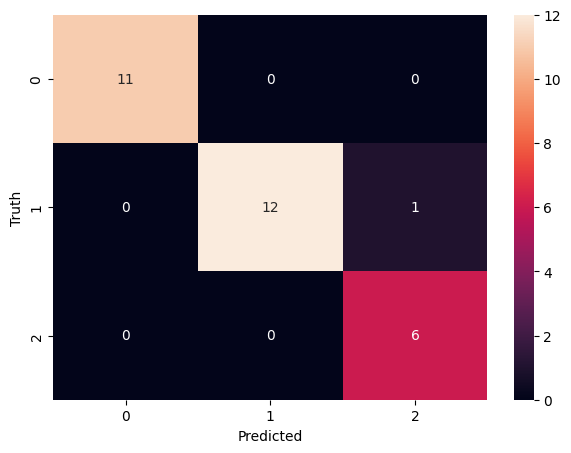

In [38]:
import seaborn as sns 
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [39]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [67]:
# K-means clustering

from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [68]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


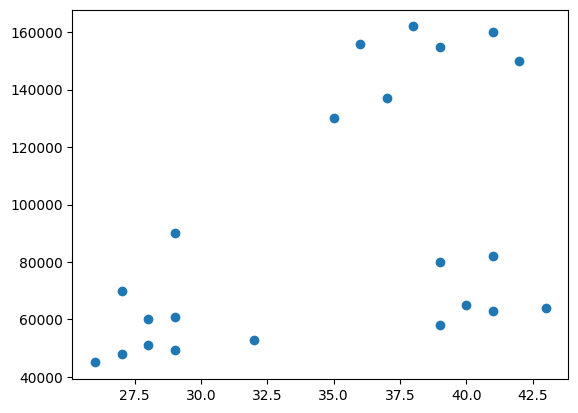

In [69]:
plt.scatter(df['Age'], df['Income($)'])

In [70]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [71]:
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [74]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluter,cluster
0,Rob,27,70000,2,2
1,Michael,29,90000,2,2
2,Mohan,29,61000,0,0
3,Ismail,28,60000,0,0
4,Kory,42,150000,1,1


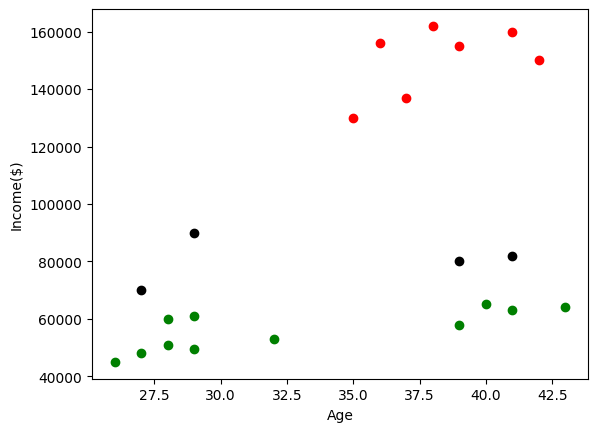

In [75]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age, df1['Income($)'], color="green")
plt.scatter(df2.Age, df2['Income($)'], color="red")
plt.scatter(df3.Age, df3['Income($)'], color="black")

plt.xlabel('Age')
plt.ylabel("Income($)")
plt.show()

In [76]:
scaler = MinMaxScaler()

scaler.fit(df[["Income($)"]])
df['Income($)'] = scaler.transform(df[['Income($)']])

scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

print(df)

        Name       Age  Income($)  cluter  cluster
0        Rob  0.058824   0.213675       2        2
1    Michael  0.176471   0.384615       2        2
2      Mohan  0.176471   0.136752       0        0
3     Ismail  0.117647   0.128205       0        0
4       Kory  0.941176   0.897436       1        1
5     Gautam  0.764706   0.940171       1        1
6      David  0.882353   0.982906       1        1
7     Andrea  0.705882   1.000000       1        1
8       Brad  0.588235   0.948718       1        1
9   Angelina  0.529412   0.726496       1        1
10    Donald  0.647059   0.786325       1        1
11       Tom  0.000000   0.000000       0        0
12    Arnold  0.058824   0.025641       0        0
13     Jared  0.117647   0.051282       0        0
14     Stark  0.176471   0.038462       0        0
15    Ranbir  0.352941   0.068376       0        0
16    Dipika  0.823529   0.170940       0        0
17  Priyanka  0.882353   0.153846       0        0
18      Nick  1.000000   0.1623

In [77]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age', 'Income($)']])
y_predicted

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [78]:
df['cluster'] = y_predicted
df.drop('cluter', axis='columns', inplace=True)
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


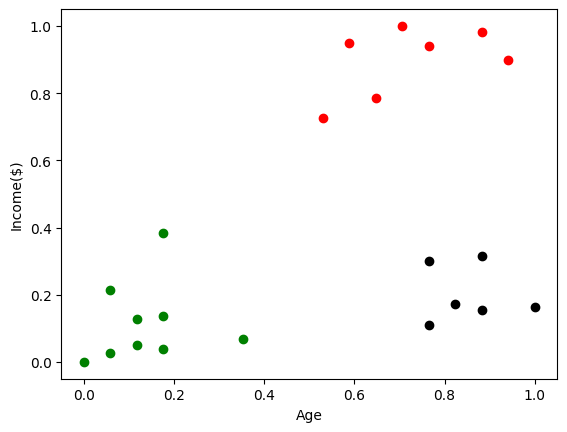

In [79]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Age, df1['Income($)'], color="green")
plt.scatter(df2.Age, df2['Income($)'], color="red")
plt.scatter(df3.Age, df3['Income($)'], color="black")

plt.xlabel('Age')
plt.ylabel("Income($)")
plt.show()

In [80]:
k_rng = range(1,10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [81]:
sse

[5.434011511988179,
 2.3456144914725936,
 0.4750783498553096,
 0.368773407644059,
 0.2900969082678042,
 0.3073820673800713,
 0.19638928932322017,
 0.15844561924841702,
 0.11890026977604241]

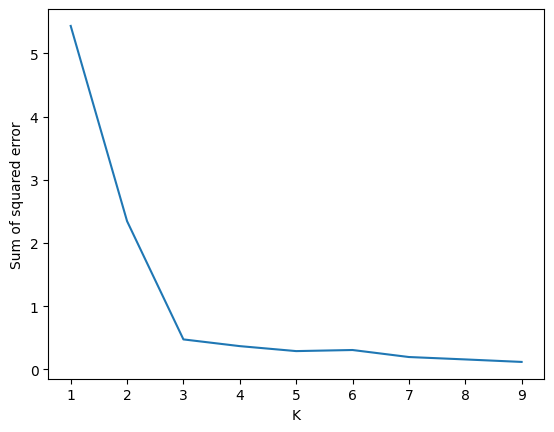

In [82]:
plt.xlabel("K")
plt.ylabel("Sum of squared error")
plt.plot(k_rng,sse)

In [93]:
# PCA

import pandas as pd
from sklearn.datasets import load_digits

In [94]:
dataset= load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [95]:
dataset.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [96]:
dataset.data[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 640x480 with 0 Axes>

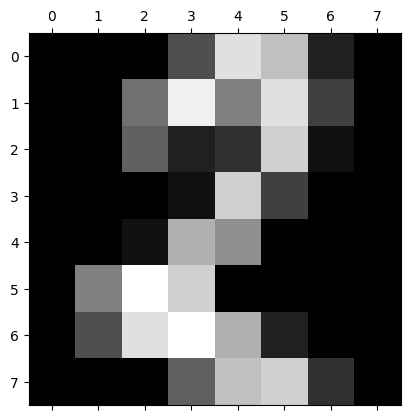

In [97]:
from matplotlib import pyplot as plt

plt.gray()
plt.matshow(dataset.data[50].reshape(8,8))

In [98]:
import numpy as np 
np.unique(dataset.target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [99]:
dataset.target[9]

9

In [102]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [103]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


In [108]:
X = df
y = dataset.target

In [109]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [110]:
from sklearn.model_selection import train_test_split

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=30)

In [113]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9722222222222222

In [114]:
from sklearn.decomposition import PCA 
pca = PCA(0.95)

X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 29)

In [115]:
pca.explained_variance_ratio_

array([0.14890594, 0.13618771, 0.11794594, 0.08409979, 0.05782415,
       0.0491691 , 0.04315987, 0.03661373, 0.03353248, 0.03078806,
       0.02372341, 0.02272697, 0.01821863, 0.01773855, 0.01467101,
       0.01409716, 0.01318589, 0.01248138, 0.01017718, 0.00905617,
       0.00889538, 0.00797123, 0.00767493, 0.00722904, 0.00695889,
       0.00596081, 0.00575615, 0.00515158, 0.0048954 ])

In [116]:
pca.n_components_

29

In [119]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)

In [120]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.9694444444444444

In [121]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_pca.shape

(1797, 2)

In [124]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)
model.score(X_test_pca, y_test)

0.6083333333333333